### Advantages of MIMIC

### The knapsack problem

In [1]:
import numpy as np
import six
import sys

sys.modules['sklearn.externals.six'] = six
import mlrose
from matplotlib import pyplot as plt

In [2]:
def fitness_func(len_series):
#     print("In fitness_func")
    Total_Weight = 1000
    Total_Vol = 1000

    n = len_series

    max_weight_pct = 0.8
    max_val = 50


    x = np.random.randint(1, max_val, size=(n,))
    weights = (Total_Weight*(x/sum(x))).astype(int)
    
    while weights.all() != True:
        x = np.random.randint(1, max_val, size=(n,))
        weights = (Total_Weight*(x/sum(x))).astype(int)
#         print(weights,"weights", sum(weights))
    
    x = np.random.randint(1, max_val, size=(n,))
    values = (Total_Vol*(x/sum(x))).astype(int)
    
    while values.all() != True:
#         print("some val 0")
        x = np.random.randint(1, max_val, size=(n,))
        values = (Total_Vol*(x/sum(x))).astype(int)
#         print(values,"values", sum(values))
        
#     print(values,"values", sum(values))
#     print(weights,"weights", sum(weights))
    fitness = mlrose.Knapsack(weights, values, max_weight_pct)
    return fitness

In [3]:

# Define decay schedule
schedule = mlrose.ExpDecay()
rhc = {}
sa = {}
ga = {}
mimic = {}

rhc['best_state'] = []
rhc['best_fitness'] = []
rhc['fitness_curve'] = []

sa['best_state'] = []
sa['best_fitness'] = []
sa['fitness_curve'] = []

ga['best_state'] = []
ga['best_fitness'] = []
ga['fitness_curve'] = []

mimic['best_state'] = []
mimic['best_fitness'] = []
mimic['fitness_curve'] = []

#Inits
max_attempts = 5
max_iters = 3
len_series  = 25

# init_state = np.array([0, 0, 0, 0, 0, 0, 0, 0])
init_state = np.zeros(len_series)
history = False


Total_runs = 20

for i in range(Total_runs):
    random_state = i
    
    state_max_val = 4
    fitness = fitness_func(len_series)
    problem = mlrose.DiscreteOpt(length = init_state.shape[0], fitness_fn = fitness, 
                                 maximize = True, max_val = state_max_val)

    # Solve problem using Random Hill Climbing
    best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
                                                                   max_iters=max_iters, restarts=1, 
                                                                   init_state=init_state, curve=history, 
                                                                   random_state=random_state)

#     print("RHC")
    rhc['best_state'].append(best_state)
    rhc['best_fitness'].append(best_fitness)  
    if history is True:
        rhc['fitness_curve'].append(fitness_curve)
        
    # Solve problem using simulated annealing
    best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule,
                                                          max_attempts = max_attempts, max_iters = max_iters,
                                                          curve=history, init_state = init_state, 
                                                                         random_state = random_state)

#     print("SA")
    sa['best_state'].append(best_state)
    sa['best_fitness'].append(best_fitness)
    if history is True:
        sa['fitness_curve'].append(fitness_curve)

    
    # Solve problem using GA
    best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=200, 
                                              mutation_prob=0.1, max_attempts=max_attempts, 
                                              max_iters=max_iters, curve=history,
                                                random_state=random_state)
#     print("GA")
    ga['best_state'].append(best_state)
    ga['best_fitness'].append(best_fitness)  
    if history is True:
        ga['fitness_curve'].append(fitness_curve)
        
    # Solve problem using MIMIC
    best_state, best_fitness = mlrose.mimic(problem, pop_size=200, 
                                        keep_pct=0.2, max_attempts=max_attempts, 
                                        max_iters=max_iters, curve=history, random_state=random_state, 
                                        fast_mimic=False)

#     print("MIMIC")
    mimic['best_state'].append(best_state)
    mimic['best_fitness'].append(best_fitness)  
    if history is True:
        mimic['fitness_curve'].append(fitness_curve)        

In [4]:
# for i in range(Total_runs):
#     print("RHC", rhc['best_fitness'][i])
#     print("SA", sa['best_fitness'][i])
#     print("GA", ga['best_fitness'][i])
#     print("MIMIC", mimic['best_fitness'][i])
#     print("")

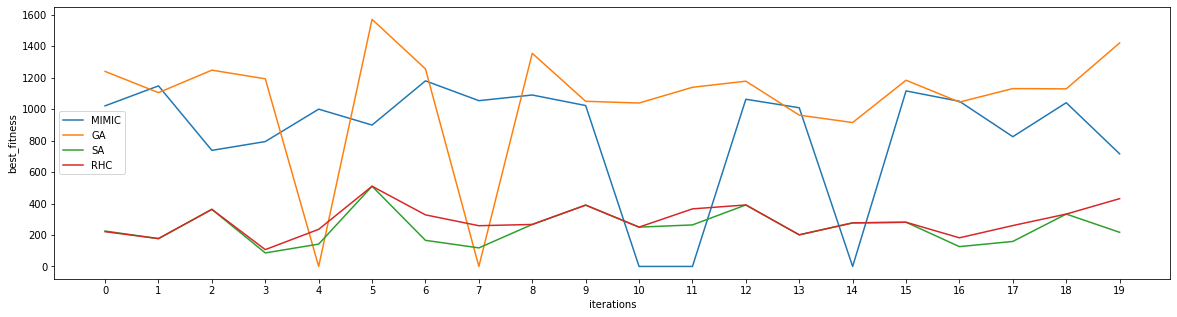

In [5]:
x = list(range(len(rhc['best_fitness'])))
plt.figure(figsize=(20,5))
plt.plot(x, mimic['best_fitness'], label="MIMIC")
plt.plot(x, ga['best_fitness'], label="GA")
plt.plot(x, sa['best_fitness'], label="SA")
plt.plot(x, rhc['best_fitness'], label="RHC")

plt.xticks(x)
plt.xlabel('iterations')
plt.ylabel('best_fitness')

plt.legend()

plt.show()